In [3]:
import numpy as np
from typing import Tuple
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from sklearn.feature_extraction import text
from sklearn.datasets import load_diabetes, load_breast_cancer, load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
import warnings
import sys

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
### Image compression (imgcompression)

A = np.random.rand(7,5)
B = np.random.rand(4,7,5)

A = np.arange(9).reshape((3,3))
B = np.array((A, A, A))
B[2,2,2] = 19

# # print(f"A: \n {A} \n")
# # print(f"B: \n {B} \n")

## SVD
u, s, vh = np.linalg.svd(A, full_matrices=True)

# print(f"U: \n {u} \n")
# print(f"Sigma: \n {s} \n")
# print(f"V: \n {vh.T} \n")

## compress
k = 3
reduced = B[0:k]
# print(reduced)
reduced.shape
# s[0:k]
# vh[0:k]
B.ndim

## rebuild_svd
np.array((np.eye(3,3), np.ones((3,3)), np.eye(3,3))) @ B

np.matmul(np.array((np.eye(3,3), np.ones((3,3)), np.eye(3,3))), B)

ss = np.array((2.5, 37, 0))
np.eye(3, 4, 4)
np.array((np.eye(k, k), np.eye(k, k), np.eye(k, k)))

## recovered_variance_proportion
AA = np.hstack((np.vstack((A, A)), np.vstack((A, A))))
_, S, _ = np.linalg.svd(AA, full_matrices=True)
varS = np.sum(np.square(S))
vars = np.sum(np.square(s))

# print(varS)
# print(vars)

B[2,2,2] = 8
_, SB, _ = np.linalg.svd(B)
sums = np.sum(B)
a = 1+2+3+4+5+6+7+8
print(a*3 == sums)

print(A)
np.sum(A, axis=1)

True
[[0 1 2]
 [3 4 5]
 [6 7 8]]


array([ 3, 12, 21])

(150, 2)


['0', '1', '2']

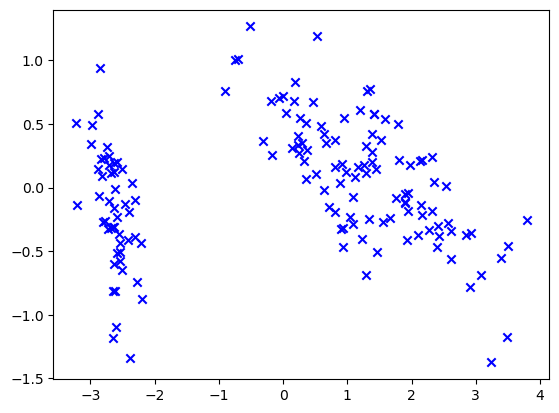

In [72]:
### PCA

## fit
means = np.mean(A, axis=0)
A-means

## transform
data = np.array([[6., 3., 7.],
						       [4., 6., 2.],
						       [6., 7., 4.],
						       [3., 7., 7.],
						       [2., 5., 4.]])
# # selfV = np.array([[-0.32657375,  0.42692645, -0.84325761],
# #  [ 0.86290603, -0.2293747,  -0.45031149],
# #  [-0.38567185, -0.87471198, -0.29348965]])

centered = data - data.mean(axis=0)
U, S ,V = np.linalg.svd(centered, full_matrices=False)

# Retain 2 first eigenvectors of Vt
V2 = (V[:2, :])

np.dot(centered, V2.T)

## transform_rv
rv = 0.99
covX = np.cov(centered.T)
sum_col = covX.sum(axis=1)
# print(S, np.sum(S))
# print(S[0]/np.sum(S), '\n', S[1]/np.sum(S), '\n', S[2]/np.sum(S))


## visualize
from pca import PCA
iris_data = load_iris(return_X_y=True)
X = iris_data[0]
y = iris_data[1]

X_new = PCA().transform(X, 2)
print(X_new.shape)

t = np.linspace(0, 150, 150, endpoint=False)

# #========================
# fig = plt.figure()
# plt.title('Iris Dataset with Dimensionality Reduction')
# plt.xlabel("Feature 1")
# plt.ylabel("Feature 2")
# PCA().visualize(X,y,fig)
# #========================

plt.scatter(X_new[:,0], X_new[:,1], c="blue", marker="x")
list = [str(np.unique(y)[0]), str(np.unique(y)[1]), str(np.unique(y)[2])]
list